# 1. Utilize o dataset global_economy do pacote fpp3 e aplique o método de médias moveis de ordem 7 na variável GDP. (Faça também o gráfico correspondente incluindo a série original e a série suavizada por MM7)


In [ ]:
install.packages("fpp3")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘warp’, ‘BH’, ‘distributional’, ‘progressr’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’, ‘urca’




In [ ]:
library(fpp3)
library(slider)
library(ggplot2)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.6     ✔ tsibble     1.1.1
✔ dplyr       1.0.7     ✔ tsibbledata 0.4.0
✔ tidyr       1.1.4     ✔ feasts      0.2.2
✔ lubridate   1.8.0     ✔ fable       0.3.1
✔ ggplot2     3.3.5     

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



In [ ]:
df <- global_economy
head(df)
summary(df)
glimpse(df)

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,537777811,NA,NA,7.024793,4.132233,8996351
Afghanistan,AFG,1961,548888896,NA,NA,8.097166,4.453443,9166764
Afghanistan,AFG,1962,546666678,NA,NA,9.349593,4.878051,9345868
Afghanistan,AFG,1963,751111191,NA,NA,16.863910,9.171601,9533954
Afghanistan,AFG,1964,800000044,NA,NA,18.055555,8.888893,9731361
Afghanistan,AFG,1965,1006666638,NA,NA,21.412803,11.258279,9938414


           Country           Code            Year           GDP           
 Afghanistan   :   58   ABW    :   58   Min.   :1960   Min.   :8.824e+06  
 Albania       :   58   AFG    :   58   1st Qu.:1974   1st Qu.:2.155e+09  
 Algeria       :   58   AGO    :   58   Median :1989   Median :1.483e+10  
 American Samoa:   58   ALB    :   58   Mean   :1989   Mean   :1.034e+12  
 Andorra       :   58   AND    :   58   3rd Qu.:2003   3rd Qu.:1.839e+11  
 Angola        :   58   ARB    :   58   Max.   :2017   Max.   :8.074e+13  
 (Other)       :14802   (Other):14802                  NA's   :3322       
     Growth             CPI             Imports          Exports      
 Min.   :-64.047   Min.   :   0.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.:  1.617   1st Qu.:  13.46   1st Qu.: 21.61   1st Qu.: 17.54  
 Median :  3.913   Median :  53.86   Median : 31.13   Median : 26.95  
 Mean   :  3.909   Mean   :  56.93   Mean   : 38.03   Mean   : 33.39  
 3rd Qu.:  6.242   3rd Qu.:  90.28   3rd Qu.:

Rows: 15,150
Columns: 9
Key: Country [263]
$ Country    <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan",…
$ Code       <fct> AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG,…
$ Year       <dbl> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,…
$ GDP        <dbl> 537777811, 548888896, 546666678, 751111191, 800000044, 1006…
$ Growth     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ CPI        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ Imports    <dbl> 7.024793, 8.097166, 9.349593, 16.863910, 18.055555, 21.4128…
$ Exports    <dbl> 4.132233, 4.453443, 4.878051, 9.171601, 8.888893, 11.258279…
$ Population <dbl> 8996351, 9166764, 9345868, 9533954, 9731361, 9938414, 10152…


In [ ]:
df2 <- global_economy %>%
  group_by(Country) %>%
  mutate(MM7 = slide_dbl(GDP, mean, .before = 2, .after = 2, .complete = TRUE))

In [ ]:
glimpse(df2)
head(df2)
tail(df2)

Rows: 15,150
Columns: 10
Key: Country [263]
Groups: Country [263]
$ Country    <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan",…
$ Code       <fct> AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG, AFG,…
$ Year       <dbl> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,…
$ GDP        <dbl> 537777811, 548888896, 546666678, 751111191, 800000044, 1006…
$ Growth     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ CPI        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ Imports    <dbl> 7.024793, 8.097166, 9.349593, 16.863910, 18.055555, 21.4128…
$ Exports    <dbl> 4.132233, 4.453443, 4.878051, 9.171601, 8.888893, 11.258279…
$ Population <dbl> 8996351, 9166764, 9345868, 9533954, 9731361, 9938414, 10152…
$ MM7        <dbl> NA, NA, 636888924, 730666689, 900888904, 1126222252, 125066…


Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,MM7
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,537777811,NA,NA,7.024793,4.132233,8996351,NA
Afghanistan,AFG,1961,548888896,NA,NA,8.097166,4.453443,9166764,NA
Afghanistan,AFG,1962,546666678,NA,NA,9.349593,4.878051,9345868,636888924
Afghanistan,AFG,1963,751111191,NA,NA,16.863910,9.171601,9533954,730666689
Afghanistan,AFG,1964,800000044,NA,NA,18.055555,8.888893,9731361,900888904
Afghanistan,AFG,1965,1006666638,NA,NA,21.412803,11.258279,9938414,1126222252


Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,MM7
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,ZWE,2012,17114849900,16.6654288,107.3283,48.99928,25.16325,14710826,16368993000
Zimbabwe,ZWE,2013,19091020000,1.9894928,109.0795,36.66874,21.98776,15054506,17953286080
Zimbabwe,ZWE,2014,19495519600,2.3769293,108.8472,33.74147,20.93015,15411675,19242637640
Zimbabwe,ZWE,2015,19963120600,1.7798727,106.2245,37.58864,19.16018,15777451,20227848120
Zimbabwe,ZWE,2016,20548678100,0.7558693,104.5606,31.27549,19.94353,16150362,NA
Zimbabwe,ZWE,2017,22040902300,4.7040354,105.5118,30.37027,19.65802,16529904,NA


Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


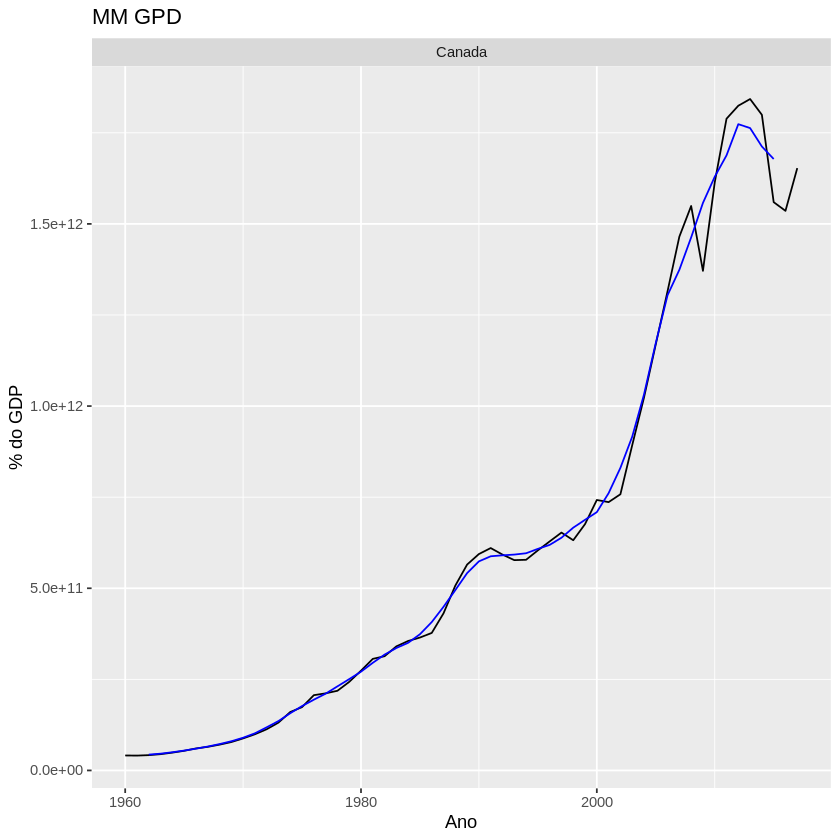

In [ ]:
df2 %>% 
  filter(Country %in% c("Canada")) %>% 
  ggplot() + # plotando gráfico
  geom_line(aes(x = Year, y = GDP)) + 
  geom_line(aes(x = Year, y = MM7), color = "blue") +
  ylab("% do GDP") +  xlab("Ano") + 
  facet_wrap(.~Country) + 
  ggtitle("MM GPD")

# 2. Utilize a variável Electricity do dataset aus_production disponível no pacote fpp3 e aplique os métodos de decomposição
### clássico
### X-11
### SEATS
### LTS

In [ ]:
df3 <- aus_production
head(df3)
glimpse(df3)

Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1956 Q1,284,5225,189,465,3923,5
1956 Q2,213,5178,204,532,4436,6
1956 Q3,227,5297,208,561,4806,7
1956 Q4,308,5681,197,570,4418,6
1957 Q1,262,5577,187,529,4339,5
1957 Q2,228,5651,214,604,4811,7


Rows: 218
Columns: 7
$ Quarter     <qtr> 1956 Q1, 1956 Q2, 1956 Q3, 1956 Q4, 1957 Q1, 1957 Q2, 1957…
$ Beer        <dbl> 284, 213, 227, 308, 262, 228, 236, 320, 272, 233, 237, 313…
$ Tobacco     <dbl> 5225, 5178, 5297, 5681, 5577, 5651, 5317, 6152, 5758, 5641…
$ Bricks      <dbl> 189, 204, 208, 197, 187, 214, 227, 222, 199, 229, 249, 234…
$ Cement      <dbl> 465, 532, 561, 570, 529, 604, 603, 582, 554, 620, 646, 637…
$ Electricity <dbl> 3923, 4436, 4806, 4418, 4339, 4811, 5259, 4735, 4608, 5196…
$ Gas         <dbl> 5, 6, 7, 6, 5, 7, 7, 6, 5, 7, 8, 6, 5, 7, 8, 6, 6, 8, 8, 7…


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


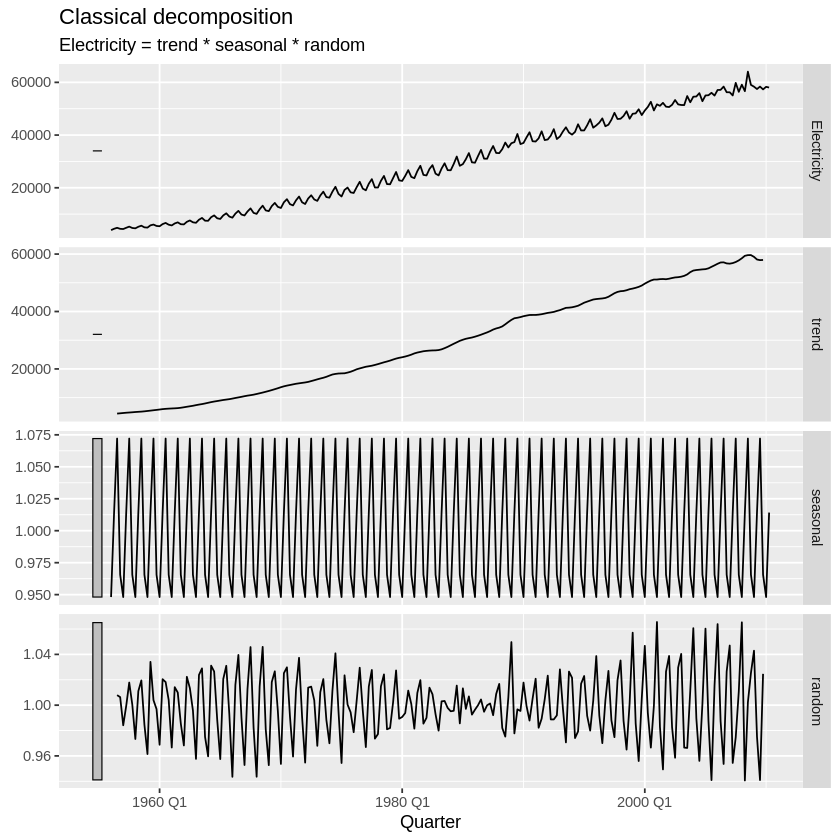

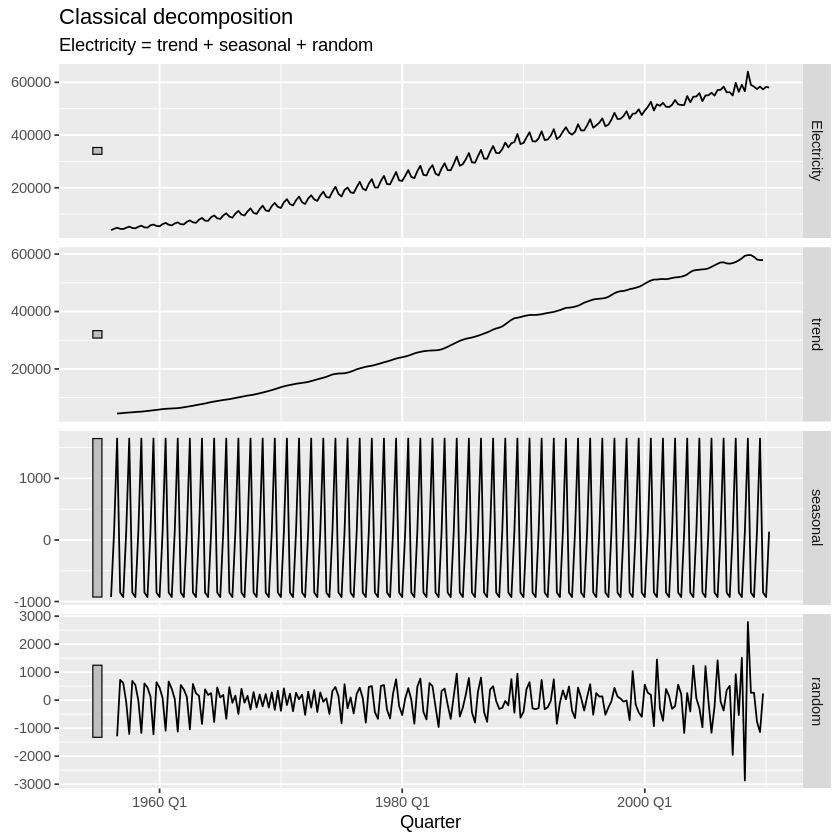

In [ ]:
# clássico aditivo
library(tsibble)
library(dplyr)

df3 %>%
  model(classical_decomposition(Electricity, type = "multiplicative")) %>%
  components() %>%  
  autoplot()

df3 %>%
  model(classical_decomposition(Electricity, type = "additive")) %>%
  components() %>%
  autoplot()

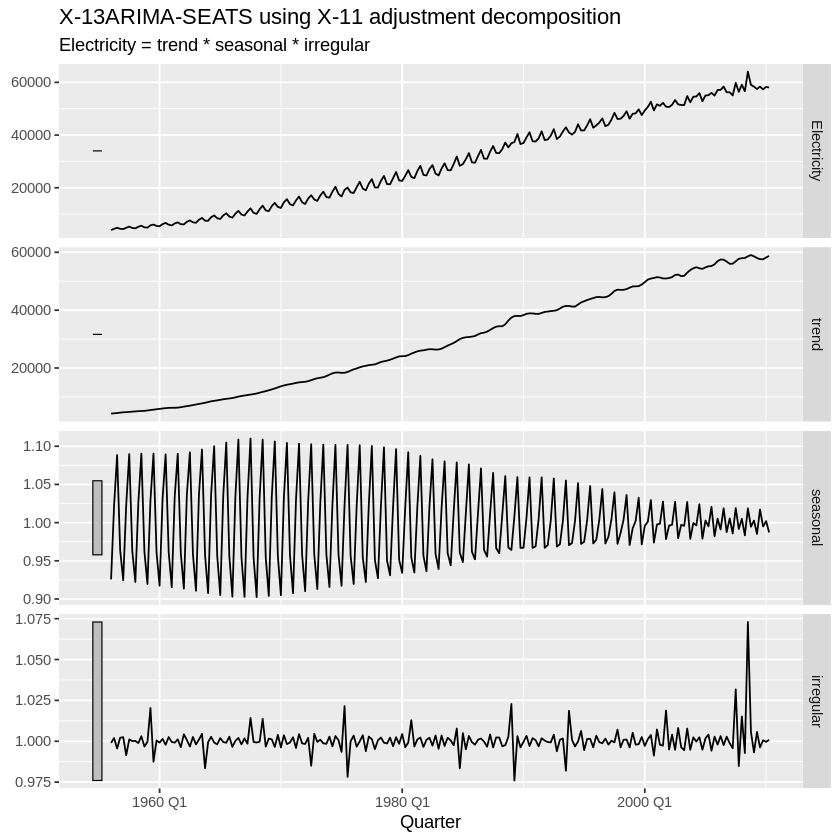

In [ ]:
# Método X-11

df3 %>%
  model(X_13ARIMA_SEATS(Electricity ~x11())) %>%
  components() %>%
  autoplot()

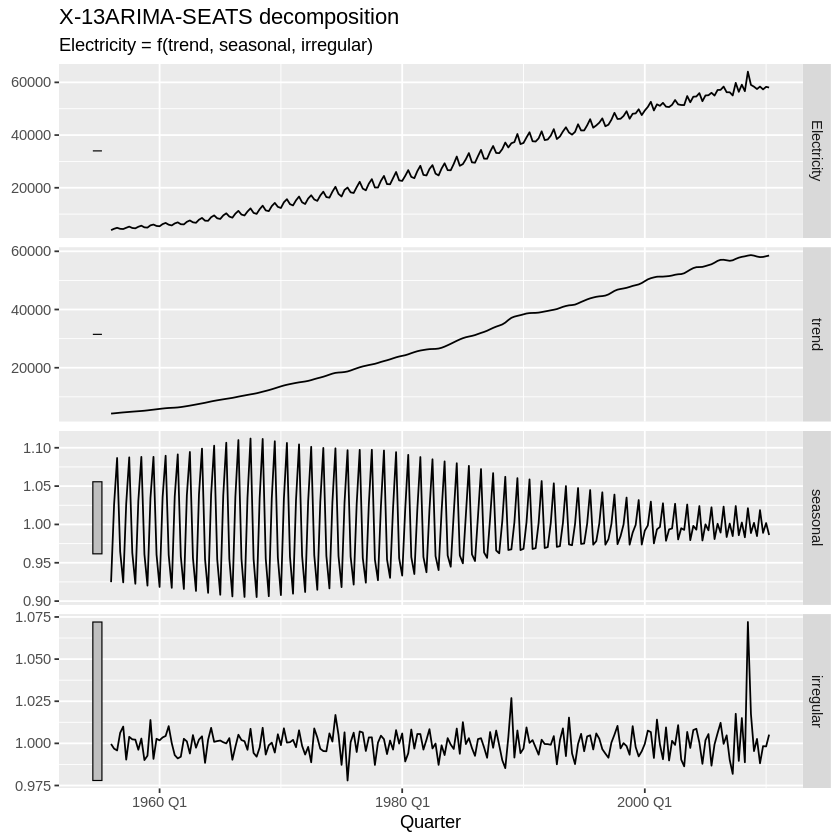

In [ ]:
# Método SEATS

df3 %>%
  model(X_13ARIMA_SEATS(Electricity ~ seats())) %>%
  components() %>%
  autoplot()

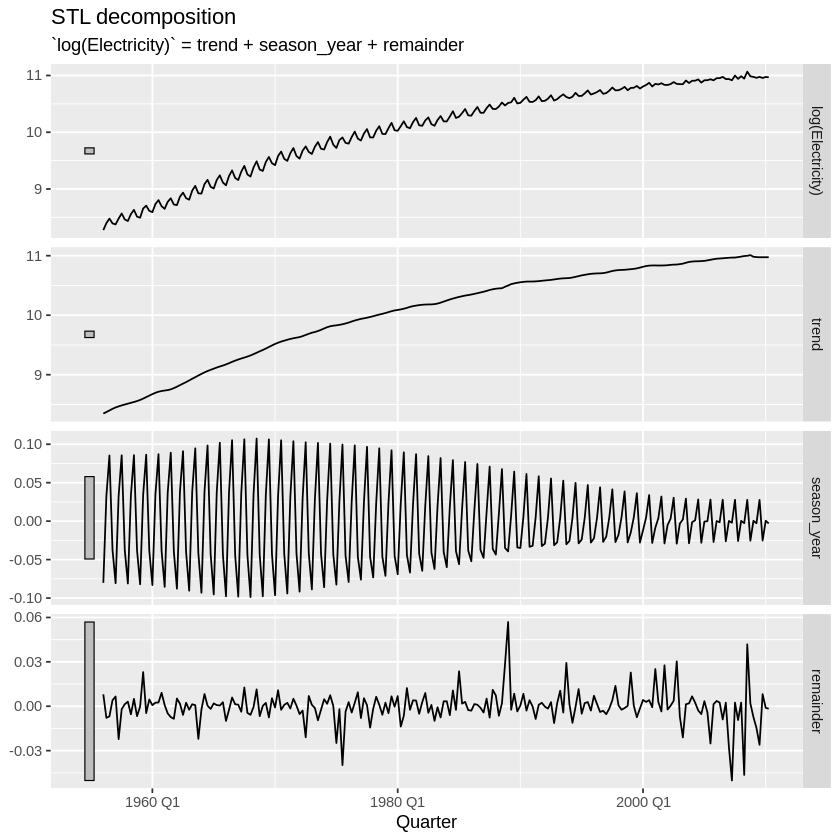

In [ ]:
# Método STL

df3 %>%
  model(STL(log(Electricity) ~ trend() + season(), robust = TRUE)) %>%
  components() %>%
  autoplot()